## Partie 0 - commandes Python essentielles

<ins>Bibliothèques utilisées

In [1]:
import numpy as np #le as np permet de raccourcir numpy en np pour l'appel
import matplotlib.pyplot as plt #idem, plt plutot que matplotlib.pyplot
from IPython.display import (Audio, display, clear_output)
#from ipywidgets import widgets
#from functools import partial
%matplotlib inline

<ins>Création d'un tableau de données 1D avec numpy

En Matlab:  
` donnees=[262 294 330 349 392 440 494 524]; % fréquence de la gamme en Hertz `  
En Python:
` donnees=np.array([262,294,330,349,392,440,494,524])

La bibliothèque numpy (ici appelée via l'abbréviation np) est le standard universel pour la manipulation de données numériques en Python

In [2]:
donnees=np.array([0,1,2,3,4,3,2,1])

affichons les données désormais contenus dans le tableau `donnees`:

In [3]:
print(donnees)

[0 1 2 3 4 3 2 1]


## Nous allons maintenant afficher les fréquences sur un graphique.  
Ce tableau (Freq_Dom), comporte les ordonnées de nos données. 
Il nous faut donc créer un deuxième tableau contenant les abscisses de nos valeurs avec la commande `linspace`.  
Comme dans tous les langages de programmation, une aide pour chaque fonction est disponible. L'aide de la fonction `linspace` se trouve [ici](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
En utilisant cette aide, expliquer ce que fait l'instruction suivante:
`x=np.linspace(1,np.size(Freq_Dom),np.size(Freq_Dom))`  
Vous notterez au passage l'utilisation d'une autre fonction de la bibliothèque numpy, la fonction `size`...   

In [4]:
x=np.linspace(1,np.size(donnees),np.size(donnees))

In [5]:
print(x)

[1. 2. 3. 4. 5. 6. 7. 8.]


Nous possédons désormais 2 tableaux de données à 1D.  
- les données d'abscisses de nos valeurs dans `x`
- les données d'ordonnées de nos valeurs dans `donnees`  
Nous pouvons donc passer au tracé des points de coordonnées (x; donnees).  
Nous utilisons (comme énormément de personnes en Python Scientifique)  la bibliothèque **matplotlib** et plus spécifiquememnt la partie **matplotlib.pyplot** qui permet de représenter les données ([aide](https://matplotlib.org/api/pyplot_api.html)) 

La façon la plus simple de tracer la courbe est d'utiliser:

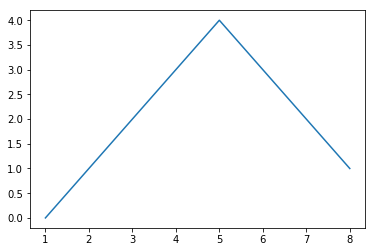

In [6]:
plt.plot(x,donnees) #plt fait référence à l'utilisation de la bibliothèque matplotlib.pyplot
plt.show()


Mais si l'on souhaite controller un peu plus l'affichage, on peut par exemple utiliser la fonction `axes`.

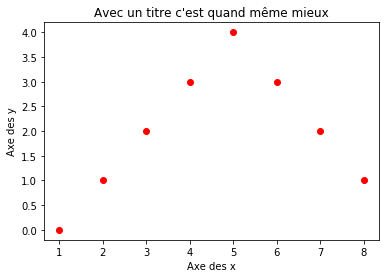

In [7]:
plt.xlabel('Axe des x')
plt.ylabel('Axe des y')
plt.title('Avec un titre c\'est quand même mieux')
plt.plot(x,donnees,'or') #le 'or' signifie l'utilisation de points 'o' de couleur rouge 'r'
plt.show()

<ins>**Exercice**</ins>: Tracer l'équation y=ax+b 

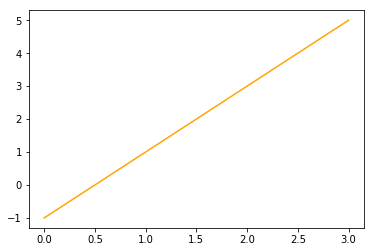

In [8]:
x=np.linspace(0,3,10)
y=2*x-1
plt.plot(x,y,'orange')
#plt.stem(x,y,'pink')
plt.show()

(*optionnel*) Dans notre cas particulier, nous aurions pu uniquement représenter les valeurs de fréquences sans avoir recours à la création de valeurs d'abscisses. Cela peut s'avérer très pratique en traitement de signal. Il suffit d'utiliser la fonction <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.stem.html?highlight=stem#matplotlib.pyplot.stem" target="_blank">stem</a>


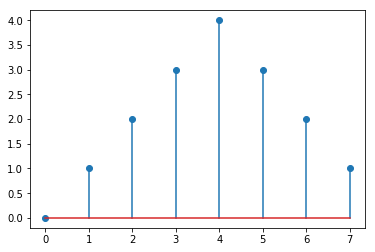

In [9]:
plt.stem(donnees)
plt.show()


<ins>**Exercice**</ins>: 
- tracer 4 périodes d'un signal sinusoïdal de fréquence 1kHz et d'amplitude 1V (en bleu `'b'`). 
Pour vous aider, la fonction sinus fait partie de la librairie numpy (`np.sin`).  
- tracer sur le même graphe (en rouge `'r'`) le même signal sinusoïdal d'amplitude 0.5 V  
- tracer sur le même graphe (en orange `'orange'`) le même signal sinusoïdal déphasé de $\frac{\pi}{4}$ et d'amplitude 1V.
Vous investiguerez l'influence du nombre de points utilisés.

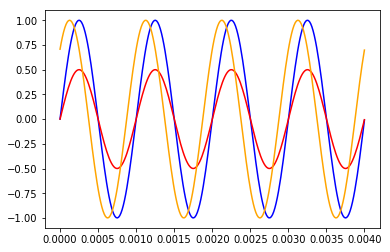

In [10]:
freq=1000 #1kHz
periode=1/freq
nbr_points=256
dt=np.linspace(0,4*periode,nbr_points)
y=np.sin(2*3.14*freq*dt)
plt.plot(dt,y,'b')
plt.plot(dt,0.5*y,'red')
plt.plot(dt,np.sin(2*3.14*freq*dt+np.pi/4),'orange')
plt.show()

## Partie 1 - Echantillonnage

Tableau 1D des fréquences des notes composant la gamme de Do Majeur:

In [11]:
Freq_DoM=np.array([262,294,330,349,392,440,494,524])

Boucle *for* pour la lecture et l'affichage des valeurs de *Freq_Dom*.  
Comprendre cet exemple vous permettra de comprendre le code qui suit.

In [12]:
for i in range (0, 8):
    print(Freq_DoM[i])

262
294
330
349
392
440
494
524


Génération d'un son à partir d'un signal calculé (ici, sinusoïdal). Plus d'aide sur la fonction Audio [ici](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html?highlight=display)

In [13]:
Fs=8192
duree=2
t=np.linspace(0,duree,duree*Fs) #equivalent de t=0:dt:2 avec dt=1/Fs à Vérifier avec Virginie
x = np.sin(Freq_DoM[0] * 2. * np.pi * t)
display(Audio(x,rate=Fs))

In [14]:
for i in range (0, 8): 
    display(Audio(np.sin(Freq_DoM[i] * 2. * np.pi * t),rate=Fs))


In [15]:
# Can also do stereo or more channels
dataleft = np.sin(np.pi*Freq_DoM[3]*t)
dataright = np.sin(np.pi*Freq_DoM[3]*t)
display(Audio([dataleft, dataright],rate=Fs))

In [16]:
# Accord
data=np.sin(np.pi*Freq_DoM[0]*t)+np.sin(np.pi*Freq_DoM[2]*t)+np.sin(np.pi*Freq_DoM[4]*t)
display(Audio(data,rate=Fs))

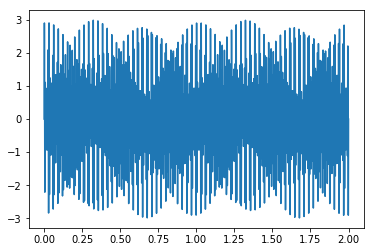

In [17]:
t=np.linspace(0,duree,int(Fs * duree))
plt.plot(t,data)
plt.show()

<ins>**Exercice**</ins>:
Il est difficile de visualiser ce signal car la durée est trop importante. Nous allons utiliser l'outile `np.resize` afin de raccourcir le nombre de données affichées.
- Calculez puis vérifiez le nombre de points du signal représenté ci-dessus. *(Fs, duree...)* 


*Réponse*: Notre fréquence d'échatillonnage est de Fs=8192, c'est à dire que l'on a ici 2\*8192 points car la durée est de 2 secondes.

In [18]:
print(2*Fs)
print(np.size(data))

16384
16384


- Redimensionnez `data` et `t` afin de n'afficher que 100 points sans changer bien évidement la fréquence du signal.  
- Calculez la nouvelle durée de votre échantillon.

In [19]:
print(np.resize(data, 100))
print(np.resize(t,100))
print("nouvelle durée=",100/Fs)

[ 0.          0.37631002  0.74621016  1.10340926  1.44185131  1.75582715
  2.04007946  2.28989879  2.50120885  2.67063943  2.79558544  2.8742511
  2.90567837  2.88975914  2.82723101  2.71965697  2.56938918  2.37951801
  2.1538072   1.89661657  1.61281408  1.30767879  0.98679694  0.65595324
  0.32101947 -0.0121572  -0.33786405 -0.65062861 -0.94531826 -1.2172319
 -1.46218167 -1.67656344 -1.85741467 -2.00245861 -2.11013425 -2.17961151
 -2.21079156 -2.20429264 -2.16142165 -2.08413253 -1.9749724  -1.83701677
 -1.67379536 -1.48921021 -1.287448   -1.07288837 -0.85001033 -0.62329884
 -0.39715327 -0.17579992  0.03678975  0.23697358  0.4215043   0.58758514
  0.73291436  0.85571802  0.95477046  1.02940239  1.07949659  1.10547152
  1.10825366  1.08923916  1.0502461   0.99345848  0.92136347  0.83668336
  0.74230407  0.64120161  0.5363685   0.43074172  0.32713376  0.22816843
  0.13622277  0.0533762  -0.01863181 -0.07843498 -0.12506351 -0.15795729
 -0.17696867 -0.18235507 -0.17476168 -0.15519492 -0.1

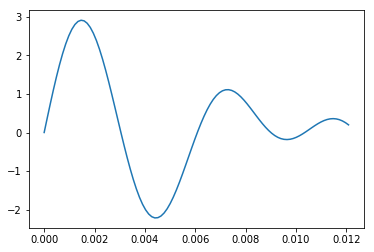

In [20]:
plt.plot(np.resize(t,100),np.resize(data, 100))
plt.show()

## PARTIE A REVOIR INTEGRALEMENT - DFT FFT

In [21]:
xa=np.fft.fftfreq(len(data),1/Fs) #voir Emi


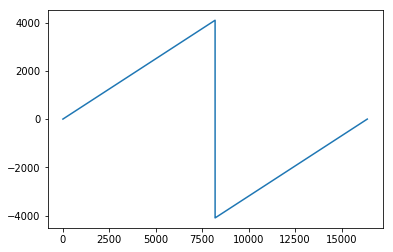

In [24]:
plt.plot(xa)
plt.show()

Zoomons sur la partie gauche du signal (de 0 à 1000 par exemple)

## Spectrogram

(array([[1.52416420e-08, 2.54883278e-10, 1.10168098e-07, ...,
         1.10168098e-07, 2.54883278e-10, 1.52416420e-08],
        [2.44568408e-07, 3.18773850e-08, 4.55816403e-07, ...,
         4.55816403e-07, 3.18773850e-08, 2.44568408e-07],
        [3.37177215e-06, 8.53437537e-07, 3.60005750e-06, ...,
         3.60005750e-06, 8.53437537e-07, 3.37177215e-06],
        ...,
        [4.29483847e-16, 5.72101309e-17, 1.40009420e-16, ...,
         1.40009433e-16, 5.72101454e-17, 4.29483934e-16],
        [4.20093797e-16, 5.57842358e-17, 9.56245653e-17, ...,
         9.56245529e-17, 5.57842400e-17, 4.20093731e-16],
        [2.08484936e-16, 2.76548107e-17, 4.04232660e-17, ...,
         4.04232680e-17, 2.76548034e-17, 2.08484945e-16]]),
 array([   0.,   32.,   64.,   96.,  128.,  160.,  192.,  224.,  256.,
         288.,  320.,  352.,  384.,  416.,  448.,  480.,  512.,  544.,
         576.,  608.,  640.,  672.,  704.,  736.,  768.,  800.,  832.,
         864.,  896.,  928.,  960.,  992., 1024., 10

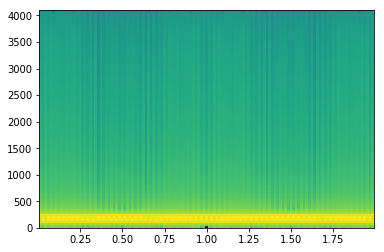

In [25]:
plt.specgram(data,Fs=8192)

## Importer un son

avec SciPy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [26]:

from scipy.io import wavfile
#import scipy.io ne semble pas utilie?
samplerate, dataRead = wavfile.read('CMchordPiano.wav') # le chemin est pris en relatif par rapport à 
                                                         #l'endroit où est enregistré le notebook (*.ipynb)

Quelques affichages pour comprendre les objets retournés par la fonction wavfile.read

In [27]:
print("Samplerate:",samplerate)
print("dataRead:",dataRead)
print("dataRead Type:", type(dataRead))

Samplerate: 48000
dataRead: [[  0   0]
 [  0   0]
 [  0   0]
 ...
 [126  29]
 [116  28]
 [ 81  26]]
dataRead Type: <class 'numpy.ndarray'>


Le fichier audio étant en stéréo, il y a 2 canaux retournés dans dataRead.
Pour accéder au canal de gauche: `dataRead[:,0]`. Pour le droit, `dataRead[:,1]`.  
Quelques commandes pratiques:

In [28]:
print(dataRead[55000:,1])#retourne les valeurs à partir de la l'index 55000 pour le canal de droite
print(dataRead[:55000,0])#retourne les valeurs jusque à l'index 55000 pour le canal de droite

[-1 -2 -2 ... 29 28 26]
[0 0 0 ... 2 1 2]


les valeurs d'abscisses

In [29]:
length = np.size(dataRead[:,0]) / samplerate #durée de l'échantillon
time = np.linspace(0., length, np.size(dataRead[:,0])) #vecteur d'abscisses, np.size(dataRead[:,0]) retourne le nombre d'échantillons

un peu d'affichage maintenant:

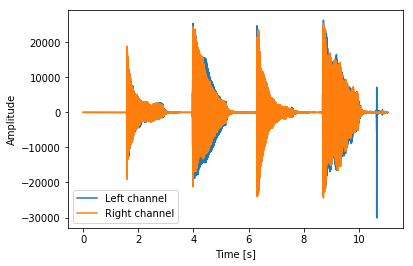

In [30]:
plt.plot(time, dataRead[:, 0], label="Left channel")
plt.plot(time, dataRead[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

Affichage du nombre de canaux et de la durée du signal audio:

In [31]:
print(dataRead.shape[0])#il y a une nuance entre les 2 (size et shape). A creuser si besoin. jetrouve size plus compréhensible mais bon...
print(np.size(dataRead[:,0]))

529920
529920


In [32]:
print(f"number of channels = {dataRead.shape[1]}")
length = dataRead.shape[0] / samplerate
print(f"length = {length}s")

number of channels = 2
length = 11.04s


un petit chronogramme du canal de gauche. J'en suis là

ValueError: only 1-dimensional arrays can be used

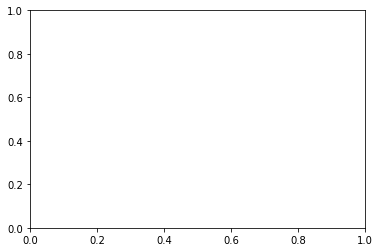

In [35]:
plt.specgram(dataRead,samplerate)